In [28]:
from data import generate_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

n = 1000

x, y, y_noisy1 = generate_dataset(n=n, noise_std=0.5, random_state=1)
_, _, y_noisy2 = generate_dataset(n=n, noise_std=1.0, random_state=1)
_, _, y_noisy3 = generate_dataset(n=n, noise_std=2.0, random_state=1)
_, _, y = generate_dataset(n=n, noise_std=0, random_state=1)

In [29]:
def gd_ols(X, y, eta=0.1, num_iters=100):
    n, d = X.shape
    theta = np.zeros(d)
    for _ in range(num_iters):
        grad = (2.0/n) * (X.T @ (X @ theta - y))
        theta -= eta * grad
    return theta

def gd_ridge(X, y, lam=0.1, eta=0.1, num_iters=100):
    n, d = X.shape
    theta = np.zeros(d)
    for _ in range(num_iters):
        grad = (2.0/n) * (X.T @ (X @ theta - y)) + 2*lam*theta
        theta -= eta * grad
    return theta

def design_matrix(x, degree):
    return np.vstack([x**i for i in range(degree+1)]).T

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)

x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)


_, _, y1_train, y1_test = train_test_split(x, y_noisy1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(x, y_noisy2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(x, y_noisy3, test_size=0.2, random_state=42)
_, _, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test_scaled = scaler.transform(x_test.reshape(-1, 1)).flatten()

degrees = range(1, 16)
etas   = [1e-6, 0.0001, 0.001, 0.01, 0.05]
iters  = [100, 500, 1000]
lambdas = [1e-6, 1e-3, 1, 3, 10]

def run_gd_experiments(x_train, y_train, x_test, y_test, degrees, etas, iters, lams, label=""):
    results = []
    for d in degrees:
        print(f"\n=== Polynomial degree {d} ===")
        X_train = design_matrix(x_train, d)
        X_test  = design_matrix(x_test, d)

        
        for eta in etas:
            for it in iters:
                th = gd_ols(X_train, y_train, eta=eta, num_iters=it)
                y_train_hat = X_train @ th
                y_test_hat  = X_test @ th
                train_m, test_m = mse(y_train, y_train_hat), mse(y_test, y_test_hat)
                train_r2, test_r2 = r2(y_train, y_train_hat), r2(y_test, y_test_hat)

                if np.isfinite(train_m) and np.isfinite(test_m):
                    results.append(("OLS", d, 0.0, eta, it, train_m, test_m, train_r2, test_r2, label))

  
        for lam in lams:
            for eta in etas:
                for it in iters:
                    th = gd_ridge(X_train, y_train, lam=lam, eta=eta, num_iters=it)
                    y_train_hat = X_train @ th
                    y_test_hat  = X_test @ th
                    train_m, test_m = mse(y_train, y_train_hat), mse(y_test, y_test_hat)
                    train_r2, test_r2 = r2(y_train, y_train_hat), r2(y_test, y_test_hat)

                    if np.isfinite(train_m) and np.isfinite(test_m):
                        results.append(("Ridge", d, lam, eta, it, train_m, test_m, train_r2, test_r2, label))

    df = pd.DataFrame(results, columns=[
        "Model", "Degree", "Lambda", "Eta", "Iters",
        "Train MSE", "Test MSE", "Train R2", "Test R2", "Noise"
    ])
    return df


df_results = run_gd_experiments(
    x_train_scaled, y1_train, x_test_scaled, y1_test,
    degrees, etas, iters, lambdas, label="noise=0.5"
)

print(df_results.head())



=== Polynomial degree 1 ===

=== Polynomial degree 2 ===

=== Polynomial degree 3 ===

=== Polynomial degree 4 ===

=== Polynomial degree 5 ===


C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:21: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_hat)**2)
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:24: RuntimeWarning: overflow encountered in square
  return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:13: RuntimeWarning: overflow encountered in matmul
  grad = (2.0/n) * (X.T @ (X @ theta - y)) + 2*lam*theta
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:13: RuntimeWarning: invalid value encountered in matmul
  grad = (2.0/n) * (X.T @ (X @ theta - y)) + 2*lam*theta
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:14: RuntimeWarning: invalid value encountered in subtract
  theta -= eta * grad
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:5: RuntimeWarning: overflow en


=== Polynomial degree 6 ===

=== Polynomial degree 7 ===

=== Polynomial degree 8 ===

=== Polynomial degree 9 ===

=== Polynomial degree 10 ===

=== Polynomial degree 11 ===

=== Polynomial degree 12 ===

=== Polynomial degree 13 ===

=== Polynomial degree 14 ===

=== Polynomial degree 15 ===
  Model  Degree  Lambda       Eta  Iters  Train MSE  Test MSE  Train R2  \
0   OLS       1     0.0  0.000001    100   0.410537  0.400878 -0.259380   
1   OLS       1     0.0  0.000001    500   0.410402  0.400736 -0.258965   
2   OLS       1     0.0  0.000001   1000   0.410233  0.400559 -0.258447   
3   OLS       1     0.0  0.000100    100   0.407252  0.397422 -0.249302   
4   OLS       1     0.0  0.000100    500   0.395227  0.384739 -0.212414   

    Test R2      Noise  
0 -0.304336  noise=0.5  
1 -0.303873  noise=0.5  
2 -0.303296  noise=0.5  
3 -0.293091  noise=0.5  
4 -0.251823  noise=0.5  


In [30]:
best_per_model = df_results.loc[df_results.groupby("Model")["Test MSE"].idxmin()]
print("Best combination per model:")
print(best_per_model)

Best combination per model:
     Model  Degree    Lambda   Eta  Iters  Train MSE  Test MSE  Train R2  \
284    OLS       4  0.000000  0.05   1000   0.266658  0.248882  0.181989   
299  Ridge       4  0.000001  0.05   1000   0.266658  0.248882  0.181989   

      Test R2      Noise  
284  0.190215  noise=0.5  
299  0.190214  noise=0.5  


In [31]:
best_per_degree = df_results.loc[
    df_results.groupby(["Model", "Degree"])["Test MSE"].idxmin()
].reset_index(drop=True)

print("Best combination per model and degree:")
print(best_per_degree)


Best combination per model and degree:
    Model  Degree    Lambda       Eta  Iters  Train MSE  Test MSE  Train R2  \
0     OLS       1  0.000000  0.050000    500   0.325932  0.307403  0.000158   
1     OLS       2  0.000000  0.050000    100   0.281203  0.270754  0.137370   
2     OLS       3  0.000000  0.050000    100   0.281204  0.270768  0.137368   
3     OLS       4  0.000000  0.050000   1000   0.266658  0.248882  0.181989   
4     OLS       5  0.000000  0.010000   1000   0.271667  0.257905  0.166624   
5     OLS       6  0.000000  0.010000   1000   0.274459  0.258896  0.158059   
6     OLS       7  0.000000  0.001000   1000   0.309801  0.299205  0.049643   
7     OLS       8  0.000000  0.001000   1000   0.308738  0.297142  0.052905   
8     OLS       9  0.000000  0.000100   1000   0.380687  0.371349 -0.167809   
9     OLS      10  0.000000  0.000100   1000   0.380897  0.372822 -0.168454   
10    OLS      11  0.000000  0.000100   1000   0.380860  0.372980 -0.168339   
11    OLS    

In [32]:
ridge_df = df_results[df_results["Model"] == "Ridge"].copy()
ridge_df = ridge_df[np.isfinite(ridge_df["Test MSE"])]       
ridge_df = ridge_df[ridge_df["Test MSE"] < 1e3]             

ols_df = df_results[df_results["Model"] == "OLS"].copy()
ols_df = ols_df[np.isfinite(ols_df["Test MSE"])]
ols_df = ols_df[ols_df["Test MSE"] < 1e3]


In [33]:

df_05 = run_gd_experiments(x_train_scaled, y1_train, x_test_scaled, y1_test,
                           degrees, etas, iters, lambdas, label="noise=0.5")

df_10 = run_gd_experiments(x_train_scaled, y2_train, x_test_scaled, y2_test,
                           degrees, etas, iters, lambdas, label="noise=1.0")

df_20 = run_gd_experiments(x_train_scaled, y3_train, x_test_scaled, y3_test,
                           degrees, etas, iters, lambdas, label="noise=2.0")

df_00 = run_gd_experiments(x_train_scaled, y_train, x_test_scaled, y_test,
                           degrees, etas, iters, lambdas, label="noise=0")


df_results = pd.concat([df_00, df_05, df_10, df_20], ignore_index=True)



=== Polynomial degree 1 ===

=== Polynomial degree 2 ===

=== Polynomial degree 3 ===

=== Polynomial degree 4 ===

=== Polynomial degree 5 ===


C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:21: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_hat)**2)
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:24: RuntimeWarning: overflow encountered in square
  return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:13: RuntimeWarning: overflow encountered in matmul
  grad = (2.0/n) * (X.T @ (X @ theta - y)) + 2*lam*theta
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:13: RuntimeWarning: invalid value encountered in matmul
  grad = (2.0/n) * (X.T @ (X @ theta - y)) + 2*lam*theta
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:14: RuntimeWarning: invalid value encountered in subtract
  theta -= eta * grad
C:\Users\Herman Nissen-Sollie\AppData\Local\Temp\ipykernel_18756\957639375.py:5: RuntimeWarning: overflow en


=== Polynomial degree 6 ===

=== Polynomial degree 7 ===

=== Polynomial degree 8 ===

=== Polynomial degree 9 ===

=== Polynomial degree 10 ===

=== Polynomial degree 11 ===

=== Polynomial degree 12 ===

=== Polynomial degree 13 ===

=== Polynomial degree 14 ===

=== Polynomial degree 15 ===

=== Polynomial degree 1 ===

=== Polynomial degree 2 ===

=== Polynomial degree 3 ===

=== Polynomial degree 4 ===

=== Polynomial degree 5 ===

=== Polynomial degree 6 ===

=== Polynomial degree 7 ===

=== Polynomial degree 8 ===

=== Polynomial degree 9 ===

=== Polynomial degree 10 ===

=== Polynomial degree 11 ===

=== Polynomial degree 12 ===

=== Polynomial degree 13 ===

=== Polynomial degree 14 ===


c:\hermanis\miniconda3\envs\geo\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\hermanis\miniconda3\envs\geo\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



=== Polynomial degree 15 ===

=== Polynomial degree 1 ===

=== Polynomial degree 2 ===

=== Polynomial degree 3 ===

=== Polynomial degree 4 ===

=== Polynomial degree 5 ===

=== Polynomial degree 6 ===

=== Polynomial degree 7 ===

=== Polynomial degree 8 ===

=== Polynomial degree 9 ===

=== Polynomial degree 10 ===

=== Polynomial degree 11 ===

=== Polynomial degree 12 ===

=== Polynomial degree 13 ===

=== Polynomial degree 14 ===

=== Polynomial degree 15 ===

=== Polynomial degree 1 ===

=== Polynomial degree 2 ===

=== Polynomial degree 3 ===

=== Polynomial degree 4 ===

=== Polynomial degree 5 ===

=== Polynomial degree 6 ===

=== Polynomial degree 7 ===

=== Polynomial degree 8 ===

=== Polynomial degree 9 ===

=== Polynomial degree 10 ===

=== Polynomial degree 11 ===

=== Polynomial degree 12 ===

=== Polynomial degree 13 ===

=== Polynomial degree 14 ===

=== Polynomial degree 15 ===


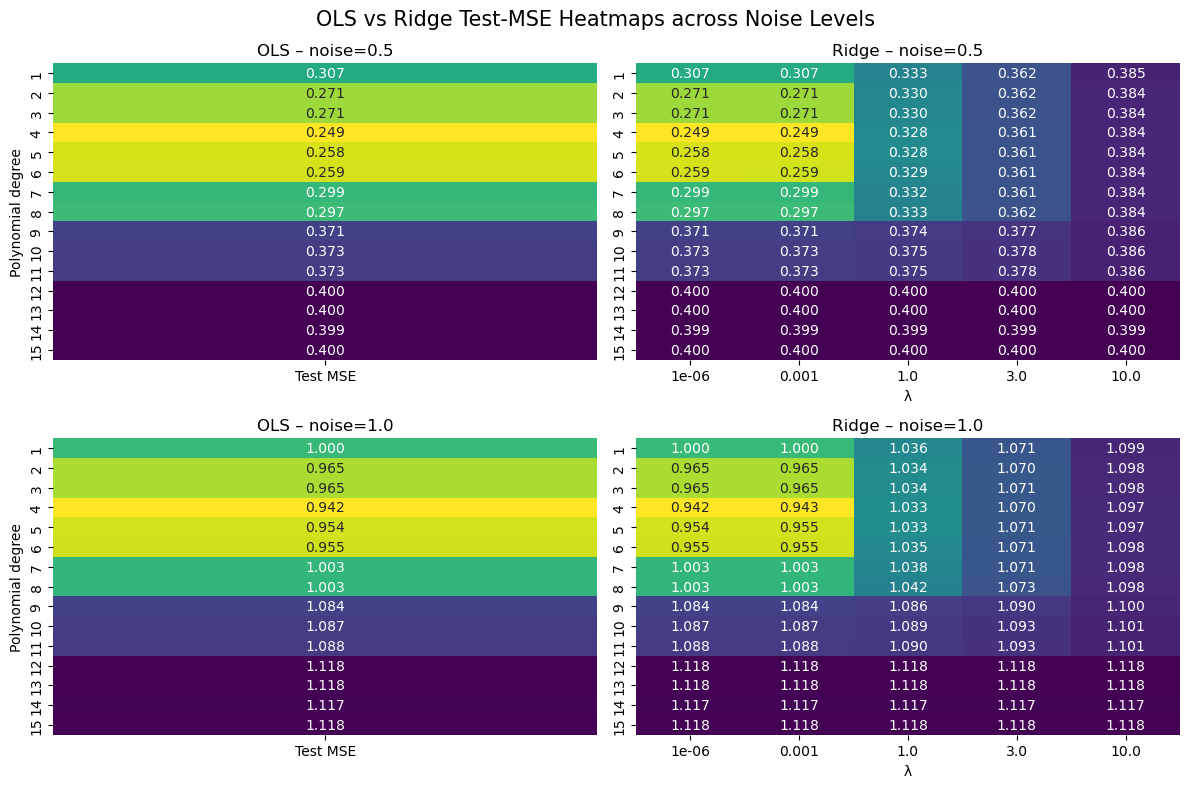

In [34]:
import seaborn as sns



noise_levels = [
    "noise=0.5", "noise=1.0"#, "noise=2.0", "noise=0"
                ]

fig, axes = plt.subplots(len(noise_levels), 2, figsize=(12, 8))

for i, noise in enumerate(noise_levels):

    ols_subset = df_results[(df_results["Model"] == "OLS") & (df_results["Noise"] == noise)]
    ols_subset = ols_subset[np.isfinite(ols_subset["Test MSE"])]
    ols_subset = ols_subset[ols_subset["Test MSE"] < 1e3]
    ols_pivot = ols_subset.pivot_table(index="Degree", values="Test MSE", aggfunc="min")

    ax1 = axes[i, 0]
    if not ols_pivot.empty:
        sns.heatmap(ols_pivot, annot=True, fmt=".3f", cmap="viridis_r", cbar=False, ax=ax1)
        ax1.set_title(f"OLS – {noise}")
        ax1.set_xlabel("")
        ax1.set_ylabel("Polynomial degree")
    else:
        ax1.set_title(f"No OLS data for {noise}")
        ax1.axis("off")


    ridge_subset = df_results[(df_results["Model"] == "Ridge") & (df_results["Noise"] == noise)]
    ridge_subset = ridge_subset[np.isfinite(ridge_subset["Test MSE"])]
    ridge_subset = ridge_subset[ridge_subset["Test MSE"] < 1e3]
    ridge_pivot = ridge_subset.pivot_table(index="Degree", columns="Lambda", values="Test MSE", aggfunc="min")

    ax2 = axes[i, 1]
    if not ridge_pivot.empty:
        sns.heatmap(ridge_pivot, annot=True, fmt=".3f", cmap="viridis_r", cbar=False, ax=ax2)
        ax2.set_title(f"Ridge – {noise}")
        ax2.set_xlabel("λ")
        ax2.set_ylabel("")
    else:
        ax2.set_title(f"No Ridge data for {noise}")
        ax2.axis("off")

plt.suptitle("OLS vs Ridge Test-MSE Heatmaps across Noise Levels", fontsize=15)
plt.tight_layout()
plt.show()


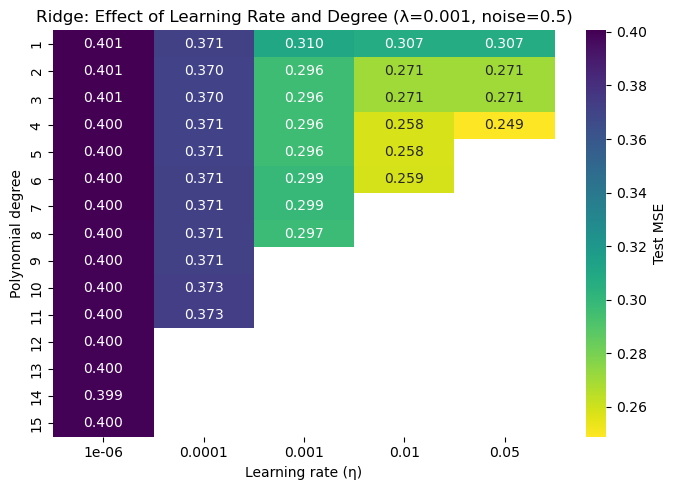

In [ ]:

subset = df_results[
    (df_results["Model"] == "Ridge") &
    (df_results["Noise"] == "noise=0.5") &
    (df_results["Lambda"] == 1)
]

pivot = ridge_df.pivot_table(index="Degree", columns="Eta", values="Test MSE", aggfunc="min")

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis_r", cbar_kws={'label':'Test MSE'})
plt.title("Ridge: Effect of Learning Rate and Degree (λ=0.1, noise=0.5)")
plt.xlabel("Learning rate (η)")
plt.ylabel("Polynomial degree")
plt.tight_layout()
plt.show()



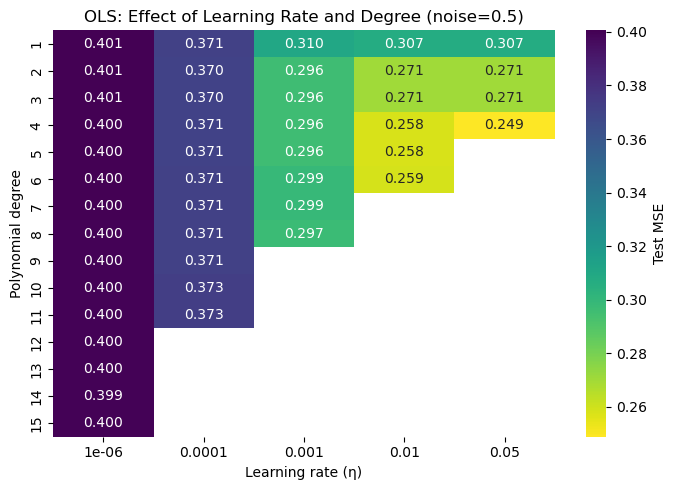

In [36]:
subset = ols_df[
    (ols_df["Noise"] == "noise=0.5")
]

pivot = subset.pivot_table(index="Degree", columns="Eta", values="Test MSE", aggfunc="min")

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis_r", cbar_kws={'label': 'Test MSE'})
plt.title("OLS: Effect of Learning Rate and Degree (noise=0.5)")
plt.xlabel("Learning rate (η)")
plt.ylabel("Polynomial degree")
plt.tight_layout()
plt.show()

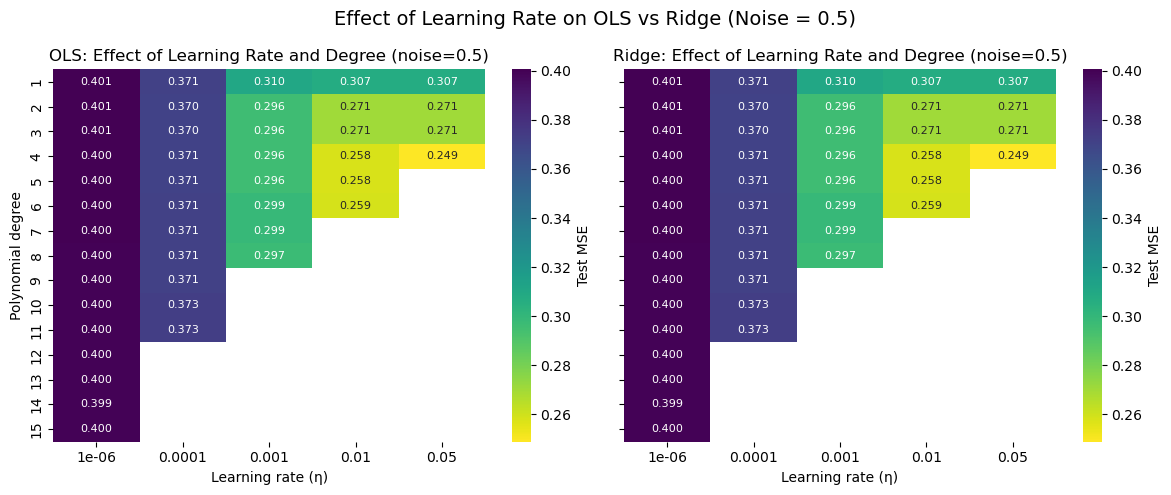

In [39]:
noise = "noise=0.5"


ols_subset = ols_df[ols_df["Noise"] == noise]
ridge_subset = ridge_df[ridge_df["Noise"] == noise]


ols_pivot = ols_subset.pivot_table(index="Degree", columns="Eta", values="Test MSE", aggfunc="min")
ridge_pivot = ridge_subset.pivot_table(index="Degree", columns="Eta", values="Test MSE", aggfunc="min")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


sns.heatmap(
    ols_pivot, annot=True, fmt=".3f", cmap="viridis_r",
    cbar_kws={'label': 'Test MSE'}, ax=axes[0], annot_kws={"size": 8}
)
axes[0].set_title(f"OLS: Effect of Learning Rate and Degree ({noise})")
axes[0].set_xlabel("Learning rate (η)")
axes[0].set_ylabel("Polynomial degree")


sns.heatmap(
    ridge_pivot, annot=True, fmt=".3f", cmap="viridis_r",
    cbar_kws={'label': 'Test MSE'}, ax=axes[1], annot_kws={"size": 8}
)
axes[1].set_title(f"Ridge: Effect of Learning Rate and Degree ({noise})")
axes[1].set_xlabel("Learning rate (η)")
axes[1].set_ylabel("")

plt.suptitle("Effect of Learning Rate on OLS vs Ridge (Noise = 0.5)", fontsize=14)
plt.tight_layout()
plt.show()